In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("talk")

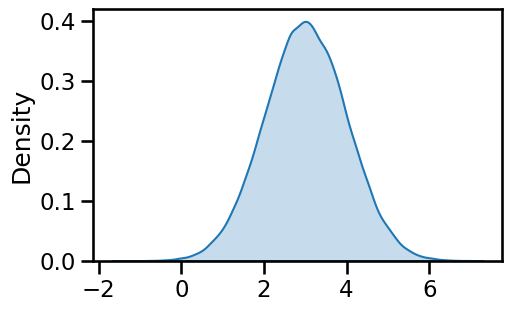

In [2]:
set0 = np.random.normal(loc=3, scale=1, size=100_000)

fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
sns.kdeplot(set0, fill=True, ax=ax)

fig.savefig("127_kdeth_0.png")

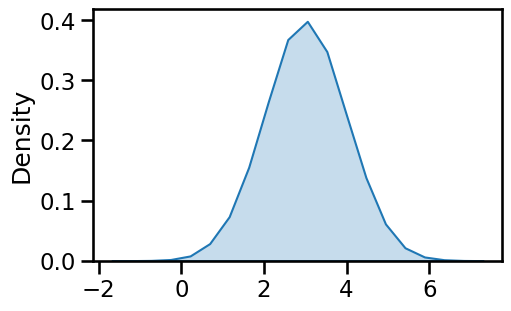

In [3]:
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
sns.kdeplot(set0, fill=True, gridsize=20, ax=ax)

fig.savefig("127_kdeth_1.png")

In [4]:
# vertices
path = ax.collections[0].get_paths()[0]
vertices = path.vertices
codes = path.codes

print(f"# vertices = {vertices}")
print(f"#    codes = {codes}")

# vertices = [[-1.68144422e+00  4.44446302e-07]
 [-1.68144422e+00  0.00000000e+00]
 [-1.20843724e+00  0.00000000e+00]
 [-7.35430261e-01  0.00000000e+00]
 [-2.62423283e-01  0.00000000e+00]
 [ 2.10583694e-01  0.00000000e+00]
 [ 6.83590672e-01  0.00000000e+00]
 [ 1.15659765e+00  0.00000000e+00]
 [ 1.62960463e+00  0.00000000e+00]
 [ 2.10261160e+00  0.00000000e+00]
 [ 2.57561858e+00  0.00000000e+00]
 [ 3.04862556e+00  0.00000000e+00]
 [ 3.52163254e+00  0.00000000e+00]
 [ 3.99463951e+00  0.00000000e+00]
 [ 4.46764649e+00  0.00000000e+00]
 [ 4.94065347e+00  0.00000000e+00]
 [ 5.41366045e+00  0.00000000e+00]
 [ 5.88666743e+00  0.00000000e+00]
 [ 6.35967440e+00  0.00000000e+00]
 [ 6.83268138e+00  0.00000000e+00]
 [ 7.30568836e+00  0.00000000e+00]
 [ 7.30568836e+00  1.28795705e-06]
 [ 7.30568836e+00  1.28795705e-06]
 [ 6.83268138e+00  3.02866974e-04]
 [ 6.35967440e+00  1.56041739e-03]
 [ 5.88666743e+00  6.12084536e-03]
 [ 5.41366045e+00  2.14539893e-02]
 [ 4.94065347e+00  6.11975981e-02]
 [ 4.46

In [5]:
# x > 2 인 꼭지점 추출
idx_th = np.where(vertices[:, 0] > 2)[0]
idx_th

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33])

In [6]:
# https://matplotlib.org/stable/api/path_api.html

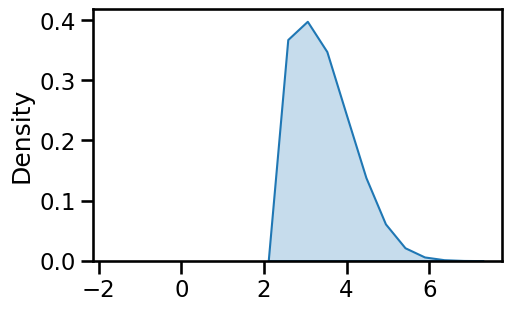

In [6]:
vertices_th = vertices[idx_th]
codes_th = codes[idx_th]

path.vertices = vertices_th
path.codes = codes_th
path.codes[0] = 1    # move
path.codes[-1] = 79  # close

display(fig)
fig.savefig("127_kdeth_2.png")

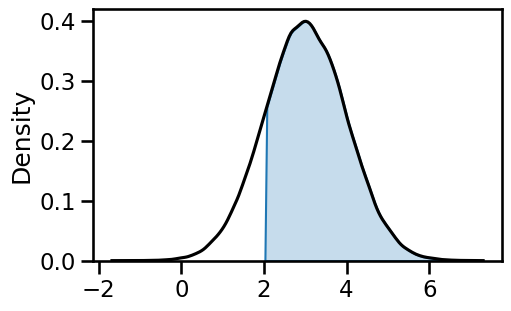

In [7]:
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)

# 1. threshold 적용 KDE plot
sns.kdeplot(set0, fill=True, ax=ax)

# vertices
path = ax.collections[0].get_paths()[0]
vertices = path.vertices
codes = path.codes

# threshold
idx_th = np.where(vertices[:, 0] > 2)[0]
vertices_th = vertices[idx_th]
codes_th = codes[idx_th]
path.vertices = vertices_th
path.codes = codes_th
path.codes[0] = 1
path.codes[-1] = 79

# 2. threshold 미적용 KDE plot
sns.kdeplot(set0, fill=False, color="k", ax=ax)

fig.savefig("127_kdeth_3.png")

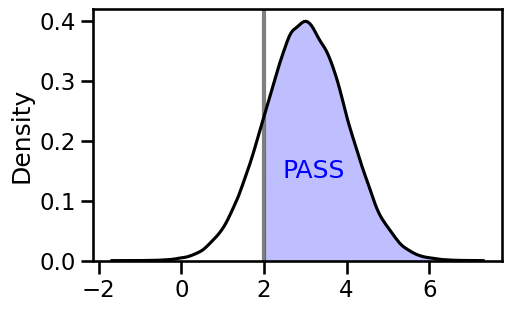

In [11]:
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)

# 1. threshold 적용 KDE plot
sns.kdeplot(set0, color="b", gridsize=500, fill=True, ax=ax)

# vertices
path = ax.collections[0].get_paths()[0]
vertices = path.vertices
codes = path.codes

# threshold
idx_th = np.where(vertices[:, 0] > 2)[0]
vertices_th = vertices[idx_th]
codes_th = codes[idx_th]
path.vertices = vertices_th
path.codes = codes_th
path.codes[0] = 1
path.codes[-1] = 79

# 2. threshold 미적용 KDE plot
sns.kdeplot(set0, fill=False, color="k", ax=ax)

# 3. additional information
ax.collections[0].set_lw(0)     # threshold 적용 KDE plot의 윤곽선 제거
ax.axvline(2, c="k", lw=3, alpha=0.5) # threshold line
ax.text(3.2, 0.15, "PASS", color="b", ha="center", va="center")

fig.savefig("127_kdeth_4.png")

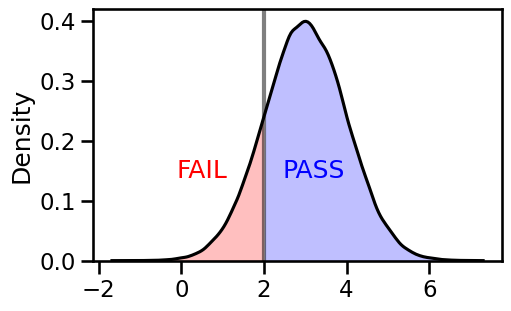

In [13]:
# PASS and FAIL
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)

# 1. threshold 적용 KDE plot
sns.kdeplot(set0, color="b", gridsize=500, fill=True, ax=ax)  # Pass
sns.kdeplot(set0, color="r", gridsize=500, fill=True, ax=ax)  # Fail

## PASS
# vertices
path_p = ax.collections[0].get_paths()[0]
vertices_p = path_p.vertices
codes_p = path_p.codes

# threshold
idx_th_p = np.where(vertices_p[:, 0] > 2)[0]
vertices_th_p = vertices_p[idx_th_p]
codes_th_p = codes_p[idx_th_p]
path_p.vertices = vertices_th_p
path_p.codes = codes_th_p
path_p.codes[0] = 1
path_p.codes[-1] = codes[-1]

## FAIL
# vertices
path_f = ax.collections[1].get_paths()[0]
vertices_f = path_f.vertices
codes_f = path_f.codes

# threshold
idx_th_f = np.where(vertices_p[:, 0] <= 2)[0]
vertices_th_f = vertices_p[idx_th_f]
codes_th_f = codes_p[idx_th_f]
path_f.vertices = vertices_th_f
path_f.codes = codes_th_f
path_f.codes[0] = 1
path_f.codes[-1] = 79

# 2. threshold 미적용 KDE plot
sns.kdeplot(set0, fill=False, color="k", ax=ax)

# 3. additional information
ax.collections[0].set_lw(0)     # PASS KDE plot의 윤곽선 제거
ax.collections[1].set_lw(0)     # FAIL KDE plot의 윤곽선 제거
ax.axvline(2, c="k", lw=3, alpha=0.5) # threshold line
ax.text(3.2, 0.15, "PASS", color="b", ha="center", va="center")
ax.text(0.5, 0.15, "FAIL", color="r", ha="center", va="center")

fig.savefig("127_kdeth_5.png")

In [14]:
from shapely.geometry import Polygon

poly_p = Polygon(vertices_th_p)
poly_f = Polygon(vertices_th_f)

print(f"# PASS: {poly_p.area*100:.2f} %")
print(f"# FAIL: {poly_f.area*100:.2f} %")
print(f"# PASS + FAIL: {(poly_p.area + poly_f.area)*100:.2f} %")

# PASS: 83.87 %
# FAIL: 15.70 %
# PASS + FAIL: 99.57 %


In [21]:
print(f"# PASS (Ground Truth): {len(set0[set0 > 2])/1e5 * 100:.2f}")
print(f"# FAIL (Ground Truth): {len(set0[set0 <= 2])/1e5 * 100:.2f}")

# PASS (Ground Truth): 84.25
# FAIL (Ground Truth): 15.75


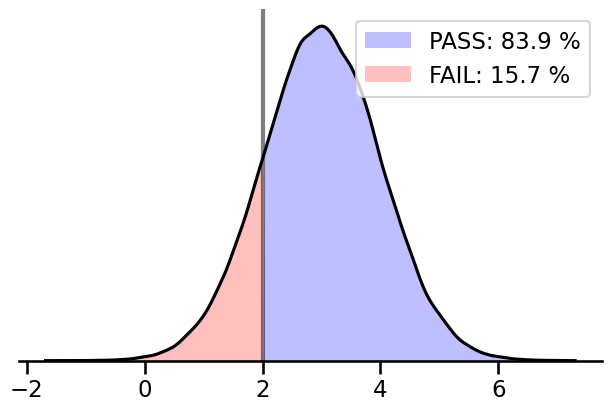

In [31]:
# 함수 만들기

def plot_passfail(data, threshold, color_pass="b", color_fail="r", gridsize=500, ax=None):
    
    if not ax:    # 입력 Axes가 없을 때, 생성
        fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)

    # 1. threshold 적용 KDE plot
    sns.kdeplot(x=data, color=color_pass, gridsize=gridsize, fill=True, ax=ax)  # Pass
    sns.kdeplot(x=data, color=color_fail, gridsize=gridsize, fill=True, ax=ax)  # Fail

    
    # 2. pass, fail thrsholding & coloring
    labels = []
    for i, (part, color_pf, label) in enumerate(zip(ax.collections, [color_pass, color_fail], ["PASS", "FAIL"])):
        part.set_lw(0)
        path = part.get_paths()[0]
        vertices = path.vertices
        codes = path.codes
        
        if i == 0: # pass
            idx_th = np.where(vertices[:, 0] > threshold)[0]
        else:
            idx_th = np.where(vertices[:, 0] <= threshold)[0]
            
        vertices_th = vertices[idx_th]
        codes_th = codes_p[idx_th]
        path.vertices = vertices_th
        path.codes = codes_th
        path.codes[0] = 1
        path.codes[-1] = 79
        
        # calculate area
        poly = Polygon(vertices_th)
        labels.append(f"{label}: {poly.area*100:.1f} %")

    # 3. threshold 미적용 KDE plot
    sns.kdeplot(data, fill=False, color="k", ax=ax)

    # 4. additional information
    ax.axvline(threshold, c="k", lw=3, alpha=0.5) # threshold line
    ax.legend(handles=ax.collections, labels=labels, loc="upper right")
    
    # 5. auxiliaries
    ax.spines[["left", "top", "right"]].set_visible(False)
    ax.set_yticks([])
    ax.set_ylabel("")
    
    return ax

ax = plot_passfail(set0, 2)
ax.figure.savefig("127_kdeth_6.png")

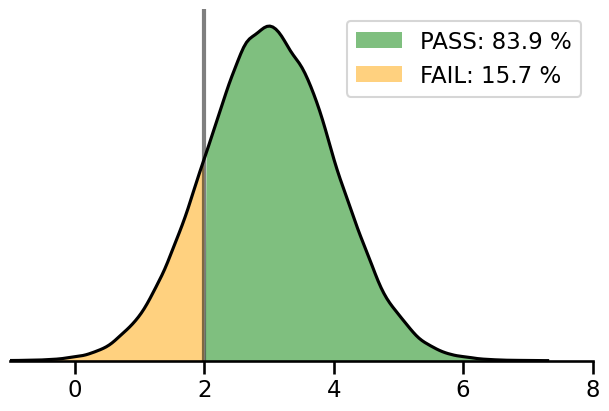

In [32]:
labels = []
for part, fc, label in zip(ax.collections, ["green", "orange"], ["PASS", "FAIL"]):
    part.set_fc(fc)
    part.set_alpha(0.5)
    vertices = part.get_paths()[0].vertices
    labels.append(f"{label}: {Polygon(vertices).area*100:.1f} %")
    
ax.legend(ax.collections, labels, loc="upper right")
ax.set_xlim(-1, 8)
display(ax.figure)

ax.figure.savefig("127_kdeth_7.png")

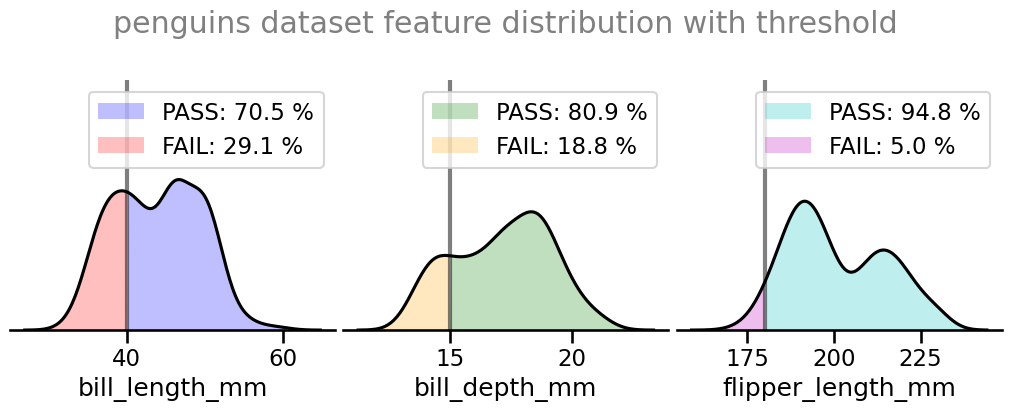

In [56]:
# 데이터셋 읽어오기
df_peng = sns.load_dataset("penguins")

# 전체 Figure 설정
fig, axs = plt.subplots(ncols=3, figsize=(10, 4), constrained_layout=True)

# Axes마다 함수 적용
plot_passfail(df_peng["bill_length_mm"], 40, ax=axs[0], color_pass="b", color_fail="r")
plot_passfail(df_peng["bill_depth_mm"], 15, ax=axs[1], color_pass="g", color_fail="orange")
plot_passfail(df_peng["flipper_length_mm"], 180, ax=axs[2], color_pass="c", color_fail="m")

# Axes마다 y 범위 설정
axs[0].set_ylim(0, 0.1)
axs[1].set_ylim(0, 0.4)
axs[2].set_ylim(0, 0.06)

# 전체 title 설정
fig.suptitle("penguins dataset feature distribution with threshold\n", color="gray")

fig.savefig("127_kdeth_8.png")